# Batch Normalization

<img src="https://api.ning.com/files/EXPL4V-n0-S-UQNnNq6bext-hycLoK-u6aEjnY7J2UyCWgn3eFDfbFC0T*6wIFSowUo2bxbUThjv1YqkRXddrKjFeLP8ZXqE/N2.jpg" width="400" height="50">


## Introduction

Purpose of Batch Normalization is to reduce overall __Covariant Shift__ that is a result of changing parameters from the previous layers are constantly changing. The effect of utilizing Batch Normalization is the ability to use higher learning rates and be less careful about weight initialization.

In [37]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal
from keras.optimizers import SGD
from keras import metrics
from keras.utils import np_utils
from keras.callbacks import Callback
from keras import backend as K

import matplotlib.pyplot as plt

import numpy as np

## Experiment 1: Activations Over Time

### Data Set 

MNIST dataset

### Neural Network Architecture:
1. 3 Fully Connected Hidden Layers
2. 100 Activations Per Hidden Layer
3. Each Hidden Layer uses Sigmoid 
4. Weights initialized to small Gaussian Values
5. Last Layer is connected to 10 Activation Layers and Cross Entropy

### Training
Training on 50,000 steps with 60 examples each per minibatch. 

### Experimental Observation 
Comparisons Made between Baseline [ Without Batch Norm ] and Batch Norm at Every Layer

### Graphs
1. Test Accuracy of the MNIST Network trained with and without Batch Normalization vs. the number of training steps.
2. The evolution of input distributions to a typical sigmoid over the course of training shown at 15th, 50th and 85th Percentile. 

### Preliminaries


In [33]:
# Setting the seed for reproducibility
seed = 7
np.random.seed( seed )

# Initializing Hyperparameters
NUM_EPOCHS  = 50000
BATCH_COUNT = 60

# Getting the MNIST Data
mnist_classes = 10
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

### Examining the MNIST Data

Shape of X Training Data: (60000, 28, 28)
Shape of Y Training Data: (60000,)


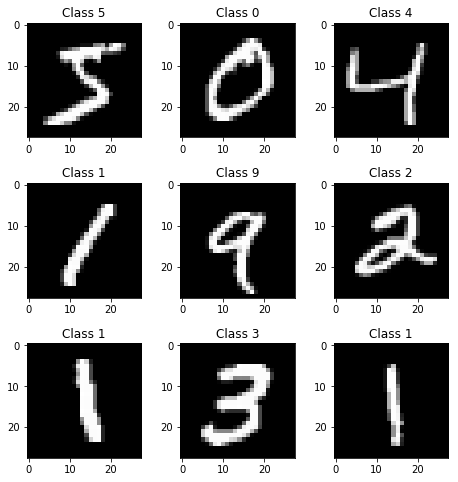

In [57]:
# Printing out the shape of the MNIST Data
print ( f"Shape of X Training Data: {X_train.shape}" )
print ( f"Shape of Y Training Data: {y_train.shape}" )

# Plotting the first few images
plt.rcParams['figure.figsize'] = (8,8)
for i in range( 9 ):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust( hspace=0.4, wspace=0.1 )
    plt.imshow( X_train[i], cmap='gray' )
    plt.title( f"Class { y_train[i]}" )

### Model Creation

In [51]:
def create_mnist_model( apply_batchnormalization = False ): 
    '''Function creates the model for the first experiment that has optionality
       to enable / disable batch normalization. 
    '''
    
    input_layer = Input( shape = ( 28, 28, 1 ))
    dense       = Dense( units = 1000,
                         input_shape = ( 28, 28, 1 ),
                         activation  = K.sigmoid
                            )( input_layer )
    
    if ( apply_batchnormalization ):
        dense  = BatchNormalization()( dense )

    # 3 Hidden Layers
    for i in range( 3 ):
        dense =  Dense( units              = 100,
                        activation         = K.sigmoid,
                        kernel_initializer = RandomNormal() )( dense )
        if ( apply_batchnormalization ):
            dense =  BatchNormalization()( dense )
            
        
    # Output Layer with 10 Units for each digit and a Softmax Activation 
    output = Dense( units = 10 , activation= K.softmax )( dense )

    model = Model( inputs = input_layer, outputs = output )
    model.compile( optimizer = 'sgd',
                   loss      = 'binary_crossentropy', 
                   metrics   = [ 'accuracy'])
    return model

In [52]:
mnist_model_no_batchnorm = create_mnist_model()
mnist_model_batchnorm    = create_mnist_model( True )

### Training the Model

## Experiment 2: ImageNet Classification